# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import gkey
from api_keys import g_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

621


In [3]:
combined_df = pd.DataFrame({'City Name':cities})
combined_df['Latitude'] = ""
combined_df['Longitude'] = ""
combined_df['Max Temp'] = ""
combined_df['Humidity'] = ""
combined_df['Cloudiness'] = ""
combined_df['Wind Speed'] = ""
combined_df['Country'] = ""
combined_df['Date'] = ""
small_list = combined_df.head(70)
small_list

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,,,,,,,,
1,visby,,,,,,,,
2,hasaki,,,,,,,,
3,jamestown,,,,,,,,
4,ushuaia,,,,,,,,
...,...,...,...,...,...,...,...,...,...
65,greystones,,,,,,,,
66,tiksi,,,,,,,,
67,attawapiskat,,,,,,,,
68,beringovskiy,,,,,,,,


In [ ]:
target_city = "souillac"

params = {"address": target_city, "key": g_key}

# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Run request
response = requests.get(base_url, params=params)

# print the response URL, avoid doing for public GitHub repos in order to avoid exposing key
# print(response.url)

# Convert to JSON
seattle_geo = response.json()

# Extract lat/lng
lat = seattle_geo["results"][0]["geometry"]["location"]["lat"]
lng = seattle_geo["results"][0]["geometry"]["location"]["lng"]


# Print results
# print(f"{target_city}: {lat}, {lng}")
seattle_geo['results']

In [4]:
params = {"key": g_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in small_list.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City Name']

    # update address key value
    params['address'] = f"{city}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        small_list.loc[index, "Latitude"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        small_list.loc[index, "Longitude"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# Visualize to confirm lat lng appear
small_list

C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,71.4501,136.112,,,,,,
1,visby,57.6348,18.2948,,,,,,
2,hasaki,40.7297,-73.9888,,,,,,
3,jamestown,37.2116,-76.7752,,,,,,
4,ushuaia,-54.8019,-68.303,,,,,,
...,...,...,...,...,...,...,...,...,...
65,greystones,53.1491,-6.07934,,,,,,
66,tiksi,71.6375,128.864,,,,,,
67,attawapiskat,52.9259,-82.4289,,,,,,
68,beringovskiy,63.0611,179.349,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = '33.7455'
lon = '-117.868'

# Build query URL
query_url = url + "appid=" + weather_api_key + "&lat=" + lat + "&lon=" + lon
weather_json = requests.get(query_url).json()
weather_json['sys']['country']

'US'

In [6]:
# params = {"key": weather_api_key}

print('Beginning Data Retrival')
print('-----------------------')

# Loop through the cities_pd and run a lat/long search for each city
for index, row in small_list.iterrows():
    
    lat = f"{row['Latitude']}"
    lon = f"{row['Longitude']}"
    
    query_url = url + "appid=" + weather_api_key + "&lat=" + lat + "&lon=" + lon

    # make request
    weather_data = requests.get(query_url)
    
    # convert to json
    weather_json = weather_data.json()
    
    counter = 0
    
    try:
        name = weather_json['name']
        print(f"Processing Record {index + 1} | {name}")
        small_list.loc[index, "Max Temp"] = weather_json['main']['temp_max']
        small_list.loc[index, "Humidity"] = weather_json['main']['humidity']
        small_list.loc[index, "Cloudiness"] = weather_json['clouds']['all']
        small_list.loc[index, "Country"] = weather_json['sys']['country']
        small_list.loc[index, "Wind Speed"] = weather_json['wind']['speed']
        small_list.loc[index, "Date"] = weather_json['dt']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        small_list.loc[index, "Max Temp"] = "NaN"
        small_list.loc[index, "Humidity"] = "NaN"
        small_list.loc[index, "Cloudiness"] = "NaN"
        small_list.loc[index, "Country"] = "NaN"
        small_list.loc[index, "Wind Speed"] = "NaN"
        small_list.loc[index, "Date"] ="NaN"
              


# Visualize to confirm lat lng appear
print('Data Retrival Complete')
small_list

Beginning Data Retrival
-----------------------
Processing Record 1 | Entuziastov


C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\16129\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

Processing Record 2 | Visby
Processing Record 3 | New York
Processing Record 4 | Williamsburg
Processing Record 5 | Ushuaia
Processing Record 6 | Albany
Processing Record 7 | Turukhansk
Processing Record 8 | Blanding
Processing Record 9 | Punta Arenas
Processing Record 10 | Hobart
Processing Record 11 | Busselton
Processing Record 12 | Tsiombe
Processing Record 13 | Tarawa
Processing Record 14 | Gore
Processing Record 15 | Carutapera
Processing Record 16 | Hithadhoo
Processing Record 17 | Hay River
Processing Record 18 | Bangassou
Processing Record 19 | Kapaa
Processing Record 20 | Söderhamn
Processing Record 21 | Rikitea
Processing Record 22 | Touchongbu
Processing Record 23 | Kenai
Processing Record 24 | Māngrol
Processing Record 25 | Qārā
Processing Record 26 | Saskylakh
Processing Record 27 | Marawi
Processing Record 28 | Pangnirtung
Processing Record 29 | Flin Flon
Processing Record 30 | Torquay
Processing Record 31 | Upernavik
Processing Record 32 | Old Saybrook Center
Processing

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,71.4501,136.112,252.09,85,0,6.9,RU,1612849188
1,visby,57.6348,18.2948,268.15,86,90,6.17,SE,1612849188
2,hasaki,40.7297,-73.9888,271.15,69,1,2.57,US,1612849188
3,jamestown,37.2116,-76.7752,276.15,87,40,2.8,US,1612848907
4,ushuaia,-54.8019,-68.303,285.15,82,40,5.66,AR,1612848902
...,...,...,...,...,...,...,...,...,...
65,greystones,53.1491,-6.07934,274.26,78,100,4.47,IE,1612849196
66,tiksi,71.6375,128.864,243,86,59,2.31,RU,1612849022
67,attawapiskat,52.9259,-82.4289,243.15,69,1,2.06,CA,1612849196
68,beringovskiy,63.0611,179.349,257.1,94,100,4.2,RU,1612849025


In [ ]:
# nan_value = float('NaN')
# small_list = small_list.replace("", nan_value, inplace=True)
# small_list = small_list.dropna(inplace=True)
# small_list

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
small_list.to_csv("output_data/cities.csv")
small_list.head(70)

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,71.4501,136.112,252.09,85,0,6.9,RU,1612849188
1,visby,57.6348,18.2948,268.15,86,90,6.17,SE,1612849188
2,hasaki,40.7297,-73.9888,271.15,69,1,2.57,US,1612849188
3,jamestown,37.2116,-76.7752,276.15,87,40,2.8,US,1612848907
4,ushuaia,-54.8019,-68.303,285.15,82,40,5.66,AR,1612848902
...,...,...,...,...,...,...,...,...,...
65,greystones,53.1491,-6.07934,274.26,78,100,4.47,IE,1612849196
66,tiksi,71.6375,128.864,243,86,59,2.31,RU,1612849022
67,attawapiskat,52.9259,-82.4289,243.15,69,1,2.06,CA,1612849196
68,beringovskiy,63.0611,179.349,257.1,94,100,4.2,RU,1612849025


In [8]:
descr_small = small_list[['Latitude','Longitude', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed', 'Date']] .describe()

In [9]:
descr_small.to_csv("Describe_Output_Data.csv")
descr_small

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,70.000000,70.000000,70.00,70,70,70.00,70
unique,70.000000,70.000000,64.00,40,25,53.00,28
top,37.211638,-3.525315,296.15,94,100,2.68,1612849191
freq,1.000000,1.000000,2.00,5,13,4.00,8


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = small_list.loc[small_list['Humidity'] > 100]
humid_city_data

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = small_list.loc[small_list['Humidity'] <= 100]
clean_city_data

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nizhneyansk,71.4501,136.112,252.09,85,0,6.9,RU,1612849188
1,visby,57.6348,18.2948,268.15,86,90,6.17,SE,1612849188
2,hasaki,40.7297,-73.9888,271.15,69,1,2.57,US,1612849188
3,jamestown,37.2116,-76.7752,276.15,87,40,2.8,US,1612848907
4,ushuaia,-54.8019,-68.303,285.15,82,40,5.66,AR,1612848902
...,...,...,...,...,...,...,...,...,...
65,greystones,53.1491,-6.07934,274.26,78,100,4.47,IE,1612849196
66,tiksi,71.6375,128.864,243,86,59,2.31,RU,1612849022
67,attawapiskat,52.9259,-82.4289,243.15,69,1,2.06,CA,1612849196
68,beringovskiy,63.0611,179.349,257.1,94,100,4.2,RU,1612849025


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
lat = clean_city_data['Latitude'].astype('float64')
long = clean_city_data['Longitude'].astype('float64')
temp = clean_city_data['Max Temp'].astype('float64')
hum = clean_city_data['Humidity'].astype('float64')
clo = clean_city_data['Cloudiness'].astype('float64')
wds = clean_city_data['Wind Speed'].astype('float64')
temp

0     252.09
1     268.15
2     271.15
3     276.15
4     285.15
       ...  
65    274.26
66    243.00
67    243.15
68    257.10
69    304.15
Name: Max Temp, Length: 70, dtype: float64

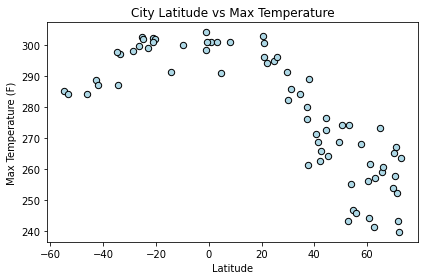

In [13]:
# lat_v_temp.plot(kind="scatter", x=lat, y=temp, grid=True, figsize=(9,9),
#               title="City Latitude Vs Max Temperature ", marker='o')
plt.scatter(lat, temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('City Latitude vs Max Temperature')
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

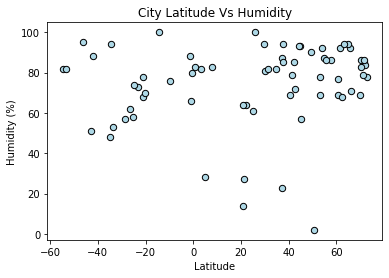

In [14]:
plt.scatter(lat, hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude Vs Humidity')
plt.tight_layout
plt.show()

## Latitude vs. Cloudiness Plot

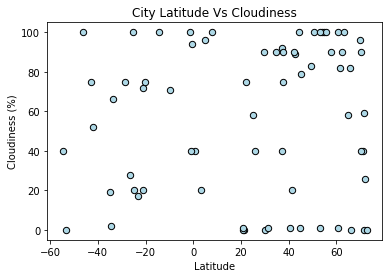

In [15]:
plt.scatter(lat, clo, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude Vs Cloudiness')
plt.tight_layout
plt.show()

## Latitude vs. Wind Speed Plot

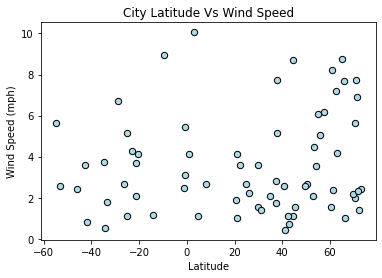

In [16]:
plt.scatter(lat, wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude Vs Wind Speed')
plt.tight_layout
plt.show()

## Linear Regression

In [17]:
north_hem = clean_city_data.loc[clean_city_data['Latitude'] > 0]
south_hem = clean_city_data.loc[clean_city_data['Latitude'] < 0]
south_hem

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,ushuaia,-54.8019,-68.303,285.15,82,40,5.66,AR,1612848902
8,punta arenas,-53.1638,-70.9171,284.15,82,0,2.57,CL,1612848912
9,hobart,-42.8821,147.327,288.71,51,75,3.6,AU,1612848911
10,busselton,-33.6532,115.345,297.04,53,66,1.79,AU,1612848903
11,tsihombe,-25.3168,45.4863,302.78,58,100,1.11,MG,1612849023
13,mataura,-46.194,168.865,284.08,95,100,2.42,NZ,1612848907
14,carutapera,-1.20979,-46.023,298.37,88,100,2.47,BR,1612849189
15,hithadhoo,-0.606057,73.0892,300.99,80,94,5.42,MV,1612849017
20,rikitea,-23.1223,-134.969,299.01,73,17,4.26,PF,1612848911
35,mananjary,-21.2245,48.3464,302.33,68,72,3.71,MG,1612849192


In [18]:
nor_lat =north_hem['Latitude'].astype('float64')
nor_long = north_hem['Longitude'].astype('float64')
nor_temp = north_hem['Max Temp'].astype('float64')
nor_hum = north_hem['Humidity'].astype('float64')
nor_clo = north_hem['Cloudiness'].astype('float64')
nor_wds = north_hem['Wind Speed'].astype('float64')
nor_lat

0     71.450058
1     57.634800
2     40.729700
3     37.211638
5     42.652579
6     65.795860
7     37.284445
12     0.918208
16    60.816218
17     4.737861
18    22.088139
19    61.305576
21    24.827903
22    60.554444
23    21.117170
24    29.878003
25    71.954308
26     8.010621
27    66.146558
28    54.765769
29    50.461921
30    72.786288
31    41.283753
32    53.935643
33    55.701617
34    20.724059
36    44.574468
37    37.752988
39    37.821037
40    62.453972
42     3.116667
44    70.485569
46    71.035707
48    31.242898
50    64.896048
51    69.702932
54    20.889335
55    49.350186
57    34.639150
59    42.246891
60    29.749124
61    25.946126
62    45.356944
63    44.507553
64    70.370640
65    53.149118
66    71.637482
67    52.925885
68    63.061125
Name: Latitude, dtype: float64

In [19]:
so_lat = south_hem['Latitude'].astype('float64')
so_long = south_hem['Longitude'].astype('float64')
so_temp = south_hem['Max Temp'].astype('float64')
so_hum = south_hem['Humidity'].astype('float64')
so_clo = south_hem['Cloudiness'].astype('float64')
so_wds = south_hem['Wind Speed'].astype('float64')
so_lat

4    -54.801912
8    -53.163833
9    -42.882138
10   -33.653158
11   -25.316847
13   -46.193952
14    -1.209794
15    -0.606057
20   -23.122303
35   -21.224514
38   -28.779653
41   -34.538522
43   -41.867500
45    -9.802860
47   -20.405950
49   -34.723996
52   -25.022531
53   -14.381662
56   -26.527692
58   -21.212901
69    -0.947083
Name: Latitude, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R Value is:-0.8510522298669007


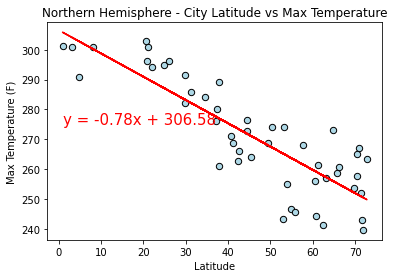

In [20]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_temp)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Northern Hemisphere - City Latitude vs Max Temperature')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(1,275),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The R Value is:0.7616690474393344


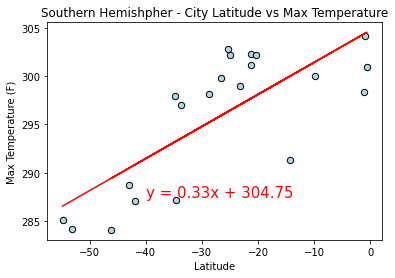

In [21]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_temp)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_temp, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Southern Hemishpher - City Latitude vs Max Temperature')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-40,287.5),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R Value is:0.2849147579458555


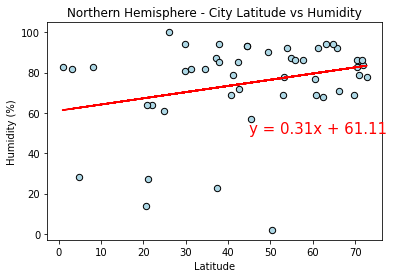

In [22]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_hum)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Northern Hemisphere - City Latitude vs Humidity')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The R Value is:0.03015940181717348


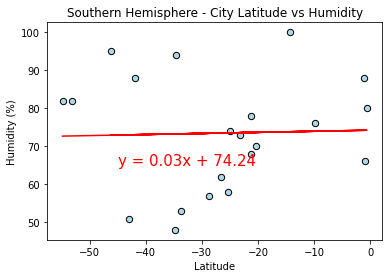

In [23]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_hum)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Southern Hemisphere - City Latitude vs Humidity')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-45,65),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R Value is:0.09099131319902315


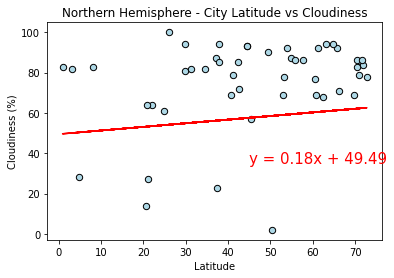

In [24]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_clo)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Northern Hemisphere - City Latitude vs Cloudiness')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(45,35),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The R Value is:0.3461305032414405


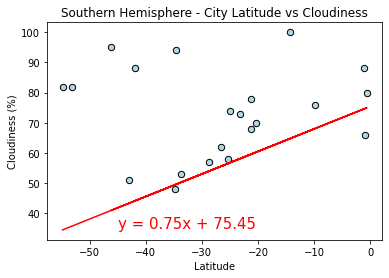

In [25]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_clo)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_hum, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Southern Hemisphere - City Latitude vs Cloudiness')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The R Value is:0.15742291194499994


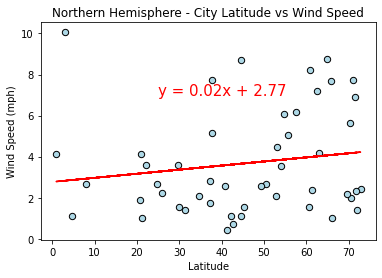

In [26]:
slope, intercept, rvalue, pvalue, stderr = linregress(nor_lat, nor_wds)
regress_values = nor_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_lat, nor_wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Northern Hemisphere - City Latitude vs Wind Speed')
plt.plot(nor_lat,regress_values,"r-")
plt.annotate(line_eq,(25,7),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The R Value is:0.18928984288671952


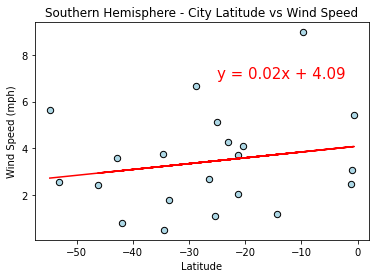

In [27]:
slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_wds)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(so_lat, so_wds, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Southern Hemisphere - City Latitude vs Wind Speed')
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
print(f" The R Value is:{rvalue}")
plt.show()